<center><h1>Assignment 2:  Training of the Adaline learning model</h1>
        <h3>Marina Orzechowski</h3></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [2]:
# read Iris data set
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.data', header = None)
df.tail()

IA = df.iloc[:,:].values
Cl = IA[:,4]

In [3]:
# get Iris classifications
IC = np.unique(Cl)
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])
          

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [5]:
# focus on classification of "virginica" and "versicolor", class indexes 1 and 2
# set to 1 and -1 in class array
cdx = [1,2] 

In [6]:
# setup Iris feature lablels
IrisF=("sepal length", "sepal width", "petal length", "petal width")
for i in range(0,4):
    print(IrisF[i])

sepal length
sepal width
petal length
petal width


In [7]:
#find total number of "virginica" and "versicolor" irises numCl
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]] or Cl[i] == IC[cdx[1]]:
        numCl += 1  
    i += 1  

In [8]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [9]:
# focus on classification of "versicolor" and "verginica", class indexes 1 and 2
# set to 1 and -1 in class array
cdx = np.array([1,2])   
# consider following cases of using 2, 3, and all 4 features
f_comb2 = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
f_comb3 = [[0,1,2],[0,1,3],[0,2,3],[1,2,3]]
f_comb4 = [0,1,2,3]

<center><h3> Two features</h3></center>

In [10]:
# function which takes a list of features and a total number of "versicolor" and "verginica" irises
# and returns a tulip where first item is a list with classes (1 or -1), second item is list of features combinations 

def NC_NF_calc(fdx, numCl):
    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 2))
    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        elif Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        i += 1
    return NC, NF 

In [11]:
# build an array of pairs: classes NC and features combinations NF    
NC_NF_pairs = []    
for fdx in f_comb2:
    NC, NF = NC_NF_calc(fdx, numCl)
    NC_NF_pairs.append([NC,NF])

To make gradient descent learn to converge mote quickly we will standardize inputs. Standardization shifts the mean of each
feature so that it is centered at zero and each feature has a standard deviation of 1

In [12]:
# Standardize Inputs
NF_std_list = []
for NC_NF_pair in NC_NF_pairs:  
    NF = NC_NF_pair[1]
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_std_list.append(NF_Std)

<p>Now we can plug in standartizied input and build cost-function plots for different combinations of two features.<br>
In calculations we used learning rate = 0.003 and number of iterations 50. We can slightly change the number of iteration or learning rate and we still should get the same accuracy.<br>
But if we increase a learning rate significally, instead of minimizing the cost function, the error becomes
larger in every epoch, because we overshoot the global minimum. At the same time, if we decrease a learning rate significally, we would need a much greater number of epochs for the algorithm to converge to the global cost minimum.</p>

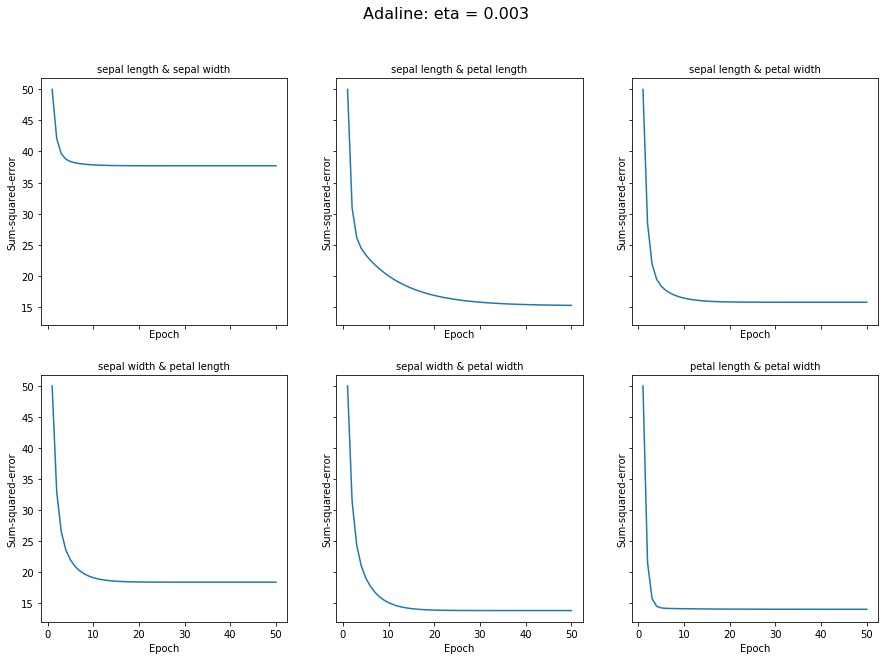

In [13]:

plt.close('all')
# create a figure and a set of subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize= (15,10), sharex=True, sharey=True)
fig.suptitle('Adaline: eta = 0.003', fontsize=16)
k = 0
k1 = 0
k2 = 0

for i in range(len(NF_std_list)):
    k1 = k//3
    k2 = k%3
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_std_list[i], NC_NF_pairs[i][0])
    ax[k1,k2].plot(range(1, len(ada.cost_) + 1), ada.cost_)
    ax[k1,k2].set_xlabel('Epoch')
    ax[k1,k2].set_ylabel('Sum-squared-error')
    ax[k1,k2].set_title(IrisF[f_comb2[i][0]]+ ' & ' + IrisF[f_comb2[i][1]], fontsize='medium')

    k+=1;
plt.show()

We can see that all the cost plots are declining and Adaline has now converged using a learning rate 0.003, however not every pair of features gives the same accuracy. For example, sum-squared-error is obviously big if we plug-in sepal length and width info. <br><br>We can also say, that petal length and petal width data leads to a fastest convergence (steep decrease) and we would need less epochs to achieve the same result. And sepal length & petal length data leads to the slowest convergence (more rounded line).<br><br>

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

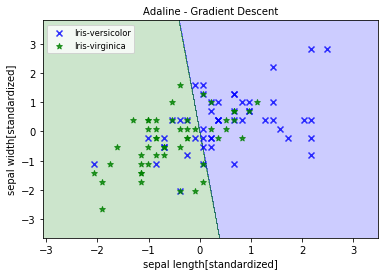

Adaline accuracy:  0.75
*********************************************************************


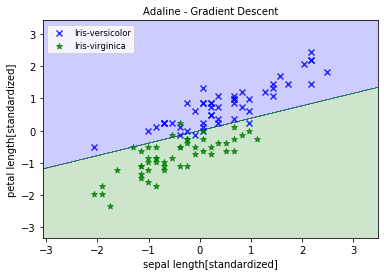

Adaline accuracy:  0.94
*********************************************************************


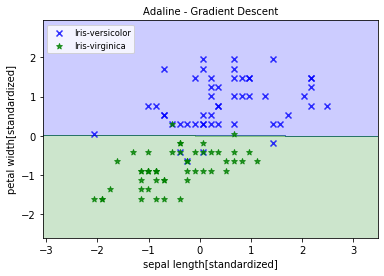

Adaline accuracy:  0.94
*********************************************************************


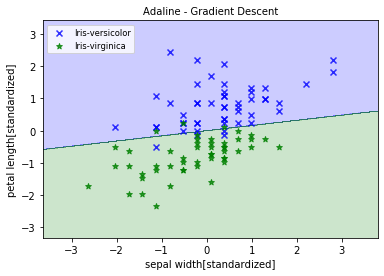

Adaline accuracy:  0.9299999999999999
*********************************************************************


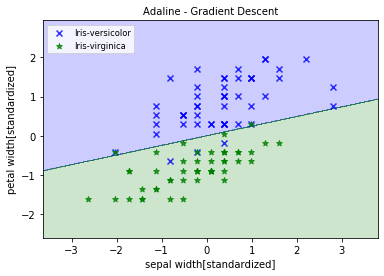

Adaline accuracy:  0.95
*********************************************************************


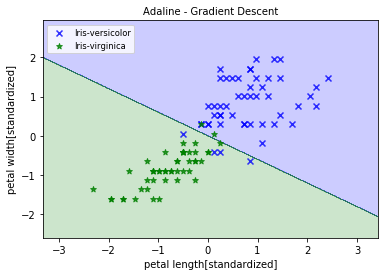

Adaline accuracy:  0.94
*********************************************************************


In [15]:
for i in range(len(NF_std_list)):
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_std_list[i], NC_NF_pairs[i][0])
    plot_decision_regions(NF_std_list[i], NC_NF_pairs[i][0], classifier = ada)
    plt.title('Adaline - Gradient Descent', fontsize='medium')
    plt.xlabel(IrisF[f_comb2[i][0]] + '[standardized]')
    plt.ylabel(IrisF[f_comb2[i][1]] + '[standardized]')
    plt.legend(loc='upper left', fontsize='small')
    plt.show()
    print('Adaline accuracy: ', ada.accuracy(NF_std_list[i], NC_NF_pairs[i][0]))
    print('*********************************************************************')      

We can see from the first figure that even after 50 iterations and learning rate 0.003 the accuracy is only 0.75, which is bad comparing to the other five figures. The average accuracy of those five models is 94.0%. But together with the first result it is only <b>90.8%</b>.

<center><h3> Three features </h3></center>

In [16]:
# function which takes a list of features and a total number of "versicolor" and "verginica" irises
# and returns a tulip where first item is a list with classes (1 or -1), second item is list of features combinations 
# this time with three features

def NC_NF_calc3(fdx, numCl):
    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 3))
    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1
        elif Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1         

        i += 1
    return NC, NF 

In [17]:
# build an array of pairs: classes NC and features combinations NF    
NC_NF_pairs = []    
for fdx in f_comb3:
    NC, NF = NC_NF_calc3(fdx, numCl)
    NC_NF_pairs.append([NC,NF])

In [18]:
# Standardize Inputs
NF_std_list = []
for NC_NF_pair in NC_NF_pairs:  
    NF = NC_NF_pair[1]
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()    
    NF_std_list.append(NF_Std)

Adaline accuracy:  0.9299999999999999
Adaline accuracy:  0.95
Adaline accuracy:  0.96
Adaline accuracy:  0.96


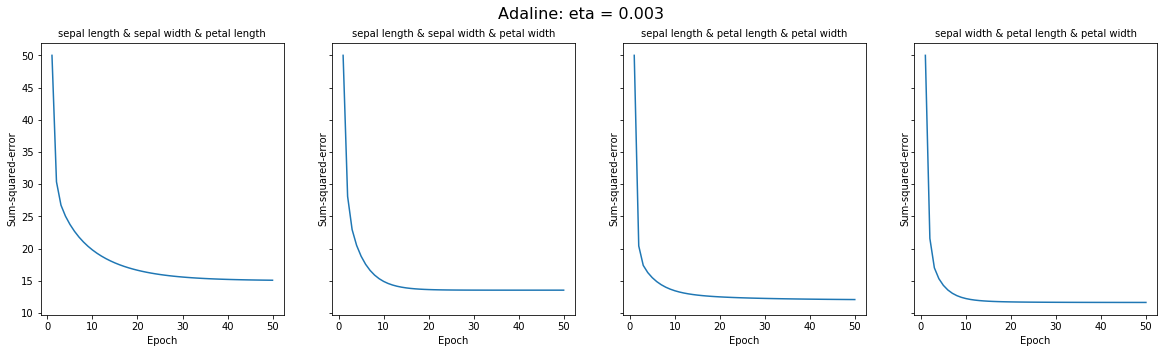

In [19]:
plt.close('all')
# create a figure and a set of subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize= (20,5), sharex=True, sharey=True)
fig.suptitle('Adaline: eta = 0.003', fontsize=16)
k = 0

for i in range(len(NF_std_list)):
    k2 = np.mod(k,4)
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_std_list[i], NC_NF_pairs[i][0])
    ax[k2].plot(range(1, len(ada.cost_) + 1), ada.cost_)
    ax[k2].set_xlabel('Epoch')
    ax[k2].set_ylabel('Sum-squared-error')
    ax[k2].set_title(IrisF[f_comb3[i][0]]+ ' & ' + IrisF[f_comb3[i][1]]+ ' & ' + IrisF[f_comb3[i][2]], fontsize='medium')
    k+=1
    print('Adaline accuracy: ', ada.accuracy(NF_std_list[i], NC_NF_pairs[i][0]))
plt.show()

The results are correlated to the two-features plots. As we mentioned before the combination sepal length and width gives the worst accuracy: 75%. In case of three-features plots the combinations with sepal length and width gave the worst accuracy again: 93% when combined with petal length and 95% when combined with petal width.<br><br>
On average the accuracy is <b>95%</b>. So by adding another feature we were able to improve the accuracy by 4.2%.

<center><h3> All four features </h3></center>

In [20]:
# function which takes a list of features and a total number of "versicolor" and "verginica" irises
# and returns a tulip where first item is a list with classes (1 or -1), second item is list of features combinations 
# this time with four features

def NC_NF_calc4(fdx, numCl):
    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 4))
    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1
        elif Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1         

        i += 1
    return NC, NF 

In [21]:
# build an array of pairs: classes NC and features combinations NF    
NC, NF = NC_NF_calc4(f_comb4, numCl)

In [22]:
# Standardize Inputs
NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()   
NF_Std[:,3] = (NF[:,3] - NF[:,3].mean()) / NF[:,3].std()

Adaline accuracy:  0.97


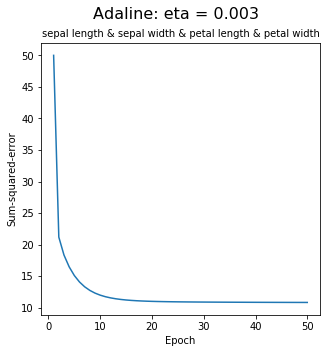

In [23]:
plt.close('all')
# create a figure and a set of subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5,5), sharex=True, sharey=True)
fig.suptitle('Adaline: eta = 0.003', fontsize=16)

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax.plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title(IrisF[f_comb4[0]]+ ' & ' + IrisF[f_comb4[1]]+ ' & ' + IrisF[f_comb4[2]]+ ' & ' + IrisF[f_comb4[3]], fontsize='medium')
print('Adaline accuracy: ', ada.accuracy(NF_Std, NC))
plt.show()

In case of all four features the accuracy is <b>97%</b>, which is better than all previous results.<br><br>
Therefore we can conclude that there is a direct proportion between the number of analyzed features and the accuracy of classifying the data.

<center><h3>Average accuracy for 2,3,4-features models</h3></center>
<table>
  <tr>
    <th>2-features</th>
    <th>3-features</th>
    <th>4-features</th>
  </tr>
  <tr>
    <td>75%</td>
    <td>93%</td>
    <td>97%</td>
  </tr>
  <tr>
    <td>94%</td>
    <td>95%</td>
    <td>*</td>
  </tr>
  <tr>
    <td>94%</td>
    <td>96%</td>
    <td>*</td>
  </tr>
  <tr>
    <td>93%</td>
    <td>*</td>
    <td>*</td>
  </tr>
  <tr>
    <td>95%</td>
    <td>*</td>
    <td>*</td>
  </tr>
  <tr>
    <td>94%</td>
    <td>*</td>
    <td>*</td>
  </tr>
  <tr>
      <td><b>90.8%</b></td>
      <td><b>95.0%</b></td>
      <td><b>97.0%</b></td>
  </tr>
</table>